
Привет очередной раз), меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>







<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Как всегда качественная работа - видно, что приложено много усилий,
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Давай еще разок

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [2]:
!pip install fast_ml
!pip install catboost

In [3]:
conda install lightgbm

In [6]:
!pip uninstall lightgbm

Found existing installation: lightgbm 3.3.5
Uninstalling lightgbm-3.3.5:
  Would remove:
    /Users/macbook/anaconda3/lib/python3.10/site-packages/lightgbm-3.3.5.dist-info/*
    /Users/macbook/anaconda3/lib/python3.10/site-packages/lightgbm/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [4]:
# импортирую все библиотеки, 

import pandas as pd
import seaborn as sns
import numpy as np
from fast_ml.model_development import train_valid_test_split
import matplotlib.pyplot as plt

from catboost import Pool
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.linear_model import ElasticNet
from lightgbm import LGBMRegressor
import time 


OSError: dlopen(/Users/macbook/anaconda3/lib/python3.10/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <D21A7969-4567-3BC7-94ED-6A9E83AE9D78> /Users/macbook/anaconda3/lib/python3.10/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


## Подготовка данных

In [ ]:
#подключаю датасет
try:
    data = pd.read_csv('autos.csv')
except:
    data = pd.read_csv('C:/Users/ivolo/Downloads/autos (1).csv')

In [38]:
print(f'Краткая информация')
print(f'Строки {data.shape[0]}')
print(f'Столбцы {data.shape[1]}')

Краткая информация
Строки 354369
Столбцы 16


Посмотрим на типы данных и проверим пропуски

In [39]:
# вывожу информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Выделяются пропуски в колонках VehicleType, Gearbox, Model, FuelType, Repaired. 

In [40]:
# смотрю лучайные 10 записей из этого датасета.
data.sample(10) 

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
229828,2016-03-16 00:59:07,8200,small,2013,manual,69,500,50000,5,petrol,fiat,no,2016-03-15 00:00:00,0,86470,2016-04-06 00:46:59
337724,2016-03-15 22:51:45,1490,coupe,1999,auto,218,clk,150000,1,petrol,mercedes_benz,no,2016-03-15 00:00:00,0,12099,2016-04-07 14:57:36
48459,2016-04-04 08:55:16,950,NaN,2017,NaN,0,NaN,150000,4,petrol,bmw,no,2016-04-04 00:00:00,0,96149,2016-04-06 09:45:51
71774,2016-03-08 18:47:29,890,NaN,2017,manual,0,corsa,150000,6,petrol,opel,no,2016-03-08 00:00:00,0,29640,2016-04-07 12:17:44
292457,2016-03-30 08:53:36,10500,sedan,2006,auto,0,phaeton,150000,10,gasoline,volkswagen,no,2016-03-30 00:00:00,0,86154,2016-04-07 01:15:25
192365,2016-03-08 20:57:12,14799,bus,2011,auto,170,touran,150000,4,gasoline,volkswagen,no,2016-03-08 00:00:00,0,29633,2016-04-05 23:16:38
189420,2016-03-08 01:48:15,7950,small,2009,manual,109,cooper,150000,3,gasoline,mini,no,2016-03-07 00:00:00,0,90766,2016-04-05 18:45:28
111657,2016-03-12 21:49:23,1200,wagon,2000,manual,97,other,150000,3,petrol,suzuki,no,2016-03-12 00:00:00,0,2797,2016-04-05 17:21:43
146934,2016-03-05 16:56:26,2700,small,1998,manual,90,golf,150000,7,gasoline,volkswagen,no,2016-03-05 00:00:00,0,74858,2016-04-07 14:58:00
266452,2016-03-27 13:57:36,19900,sedan,2013,manual,122,a_klasse,20000,11,petrol,mercedes_benz,no,2016-03-27 00:00:00,0,42349,2016-04-07 09:46:34


Приведу описание столбцов

* date crawled — дата скачивания анкеты из базы
* price — цена (евро), Является целевым признаком
* vehicle type — тип автомобильного кузова
* registration year — год регистрации автомобиля
* gearbox — тип коробки передач
* power — мощность (л. с.)
* model — модель автомобиля
* kilometer — пробег (км)
* registration_month — месяц регистрации автомобиля
* fuel type — тип топлива
* brand — марка автомобиля
* repaired — была машина в ремонте или нет
* date created — дата создания анкеты
* number of pictures — количество фотографий автомобиля
* postal code — почтовый индекс владельца анкеты (пользователя)
* last seen — дата последней активности пользователя


In [41]:
#создаю  оформленную таблицу, отображающей процент пропущенных значений в каждом столбце датасета
pd.DataFrame(round(data.isna().mean()*100,1)).sort_values(by=0, ascending=False).style.background_gradient(cmap='Blues')


,0
Repaired,20.100000
VehicleType,10.600000
FuelType,9.300000
Gearbox,5.600000
Model,5.600000
DateCrawled,0.000000
Price,0.000000
RegistrationYear,0.000000
Power,0.000000
Kilometer,0.000000


Больше всего пропусков repaired. Так же пропуски есть в vehicle type=10, fuel type- 9%, gearbox=5.6, model - достаточно важные признаки, наблюдается 5+%  пропущеных. При  этом стоит учитывать, что модель, тип топлива и  коробка передач сильно влияют на цену. Причин пропусков может быть много.

<div class="alert alert-block alert-info">
<b>Совет:</b> У fuel_type есть категории, которые означают одно и тоже - их можно объединить
</div>

**ДУБЛИКАТЫ В ДАТАСЕТЕ**

In [42]:
print('Количество дубликатов = ', data.duplicated().sum()) #проверяю датасет на дубликаты

Количество дубликатов =  4


In [43]:
data = data.drop_duplicates().reset_index(drop=True) #удаляю дубликаты
data.duplicated().sum()

0

**ИЗУЧЕНИЕ ДАТАСЕТА**

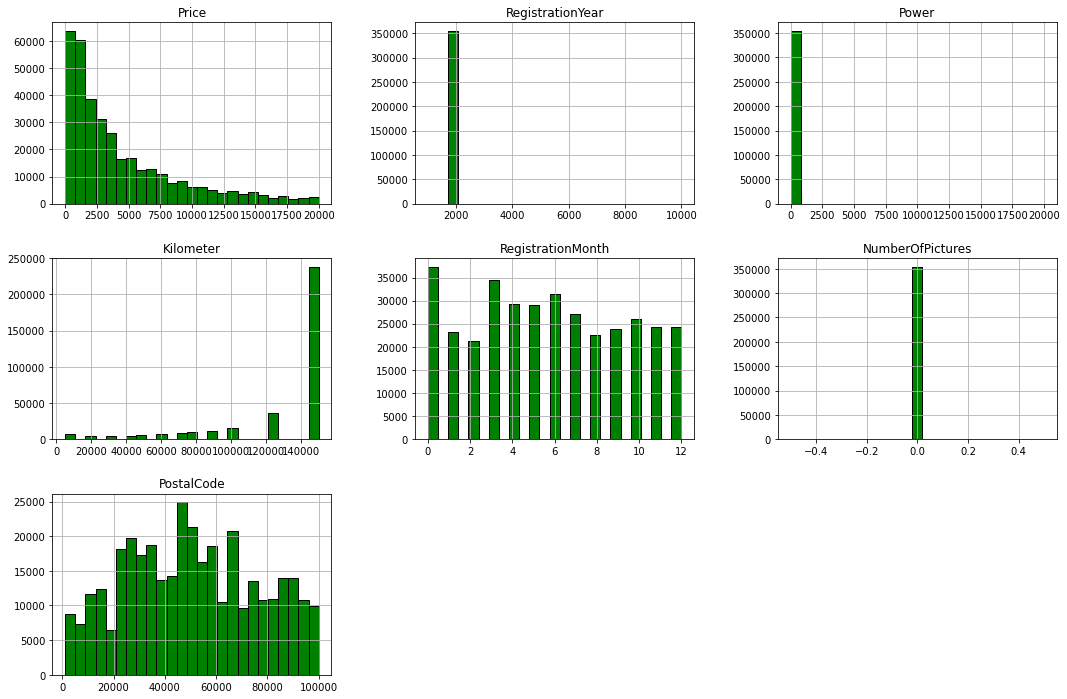

In [44]:
#построю гистограммы распределения данных, использую matplotlib
data.hist(bins=25, figsize=(18,12), edgecolor='black', grid=True,color='green',)
plt.show()

In [45]:
data.describe() #Смотрю статист. данные о датасете

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365.0,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989,5.714650,0.0,50508.503800
std,4514.176349,90.228466,189.851330,37905.083858,3.726432,0.0,25783.100078
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


По году, цене и мощности выявлены странные значения- выбросы. Следует отфильтровать их

In [46]:
# очищю данных от выбросов.
cols_clean = ['Power', 'RegistrationYear', 'Price']
low = .01
high = .99
quant_df = data[cols_clean].quantile([low, high])
data_clean = data[cols_clean].apply(lambda x: x[(x > quant_df.loc[low, x.name]) & 
                                     (x < quant_df.loc[high, x.name])], axis=0)
data_clean.dropna(inplace=True)
data_clean.describe()

,Power,RegistrationYear,Price
count,295309.000000,295309.000000,295309.000000
mean,117.495017,2003.344341,4569.945962
std,48.042445,6.179831,4282.808988
min,1.000000,1981.000000,1.000000
25%,75.000000,1999.000000,1299.000000
50%,110.000000,2003.000000,2999.000000
75%,145.000000,2007.000000,6600.000000
max,299.000000,2017.000000,18799.000000



<div class="alert alert-block alert-success">
<b>Успех:</b>  А около-нулевые цены, не кажется подозрительными? Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Но я не согласен с удалением данных, используя верхнюю границу. Разве цены на машины в 19,20 тысяч евро являются неадекватными? Это ценные наблюдения, которые мы можем потерять
</div>



<div class="alert alert-block alert-success">
<b>Успех:</b> С границами года регистрации согласен
</div>


Аномалий нет. Можно применять этот вид фильтрации(по квантилям)

In [47]:
df = data[data.index.isin(data_clean.index)].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295309 entries, 1 to 354364
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        295309 non-null  object
 1   Price              295309 non-null  int64 
 2   VehicleType        277188 non-null  object
 3   RegistrationYear   295309 non-null  int64 
 4   Gearbox            289602 non-null  object
 5   Power              295309 non-null  int64 
 6   Model              284051 non-null  object
 7   Kilometer          295309 non-null  int64 
 8   RegistrationMonth  295309 non-null  int64 
 9   FuelType           277170 non-null  object
 10  Brand              295309 non-null  object
 11  Repaired           250363 non-null  object
 12  DateCreated        295309 non-null  object
 13  NumberOfPictures   295309 non-null  int64 
 14  PostalCode         295309 non-null  int64 
 15  LastSeen           295309 non-null  object
dtypes: int64(7), object(

Обработаю пропуски-поставлю в пропуски "no_data"

In [48]:
nans = ['Repaired', 'VehicleType', 'FuelType', 'Gearbox', 'Model']
df[nans] = df[nans].fillna('no_data')

<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски обработаны хорошим образом
</div>


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295309 entries, 1 to 354364
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        295309 non-null  object
 1   Price              295309 non-null  int64 
 2   VehicleType        295309 non-null  object
 3   RegistrationYear   295309 non-null  int64 
 4   Gearbox            295309 non-null  object
 5   Power              295309 non-null  int64 
 6   Model              295309 non-null  object
 7   Kilometer          295309 non-null  int64 
 8   RegistrationMonth  295309 non-null  int64 
 9   FuelType           295309 non-null  object
 10  Brand              295309 non-null  object
 11  Repaired           295309 non-null  object
 12  DateCreated        295309 non-null  object
 13  NumberOfPictures   295309 non-null  int64 
 14  PostalCode         295309 non-null  int64 
 15  LastSeen           295309 non-null  object
dtypes: int64(7), object(

Пропусков нет

In [50]:
df.sample(5) #смотрю случайную выборку 10 строк

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
79947,2016-03-23 19:46:13,6500,bus,2005,manual,116,sharan,150000,1,gasoline,volkswagen,no,2016-03-23 00:00:00,0,49393,2016-04-06 00:46:15
288886,2016-03-16 11:59:28,4200,coupe,2004,manual,150,other,150000,4,gasoline,alfa_romeo,no,2016-03-16 00:00:00,0,27607,2016-04-06 05:16:29
187592,2016-03-25 12:49:38,3690,convertible,2004,manual,95,ka,90000,4,petrol,ford,no,2016-03-25 00:00:00,0,98593,2016-04-06 14:16:57
285388,2016-03-26 13:06:21,16500,bus,2015,auto,140,meriva,10000,5,petrol,opel,no,2016-03-26 00:00:00,0,65479,2016-04-06 11:46:54
63445,2016-04-01 14:52:21,15499,bus,2014,manual,156,c4,30000,6,petrol,citroen,no,2016-04-01 00:00:00,0,67577,2016-04-07 12:16:04


В датасте есть столбцы, не влияющие на стоимость. Удаляю их

In [51]:
print(df.columns)

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')


In [52]:
my_cols = ['DateCrawled', 'RegistrationMonth','DateCreated', 
        'NumberOfPictures', 'PostalCode', 'LastSeen'] #создал список
df = df.drop(my_cols, axis=1) # удаляю указанные столбцы
df.sample(9) # еще раз смотрб случайную выборку

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
220493,6999,wagon,2006,manual,200,a4,150000,petrol,audi,no
228386,6990,bus,2004,manual,140,touran,150000,gasoline,volkswagen,no
310486,2850,no_data,2016,manual,58,polo,150000,petrol,volkswagen,no_data
254955,9000,wagon,2007,manual,177,3er,150000,gasoline,bmw,no
251120,7999,sedan,2010,manual,95,a_klasse,90000,petrol,mercedes_benz,no
125588,950,coupe,1995,manual,102,3er,150000,petrol,bmw,no
147564,1770,small,2001,manual,60,polo,150000,petrol,volkswagen,no
268577,4999,no_data,2017,no_data,105,golf,150000,gasoline,volkswagen,no_data
78410,1100,wagon,1999,manual,101,octavia,150000,petrol,skoda,no_data


<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - верное решение.
</div>


Финальная проверка на дубли, после обработки и дропа

In [53]:
# удаляю дубликаты из датасет и смотрю как изменилось их количество.
dups = df.duplicated().sum()
print('Кол-во  дубликатов до', dups)
df = df.drop_duplicates()
dups = df.duplicated().sum()
print('Кол-во  дубликатов после', dups)

Кол-во  дубликатов до 38956
Кол-во  дубликатов после 0


Выводы:


* Загрузил и проанализировал данные. Привел датасет к приемлемой для анализа структуре:
* Отобрал необходимые для анализа данные
* Заполнил пропущенные значения
* Удалил выбросы
* Проверил на дубликаты
* Удалил признаки, не влияющие на целевой признак.

Это позволит более качествено и быстро работать с данными. Перехожу к построению моделей


<div class="alert alert-block alert-success">
<b>Успех:</b> В целом хорошая, детальная предобработка - идем дальше
</div>


## Обучение моделей

In [54]:
#разбиваю данные, смотрим как модель будет работать на новых данных
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Price', train_size=0.8, valid_size=0.1, test_size=0.1)

In [55]:
categorial_features = list(X_train.select_dtypes(include=['object']).columns)
categorial_features # получаю список признаков обуч выборки

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

### LightGBM

Пробую обучить модель с помощью LightGBM.
LightGBM - библиотека для градиентного бустинга, может обрабатывать категориальные признаки. Особенность -необходимо чтобы  категориальные признаки имели тип 'category'. Измеряю время обучения/предсказания моделей

In [56]:
features_train_gbm = X_train.copy() 
#делаю копию обучающей выборки для обучения модели

In [57]:
# преобразовываю все категориальные признаки в category
for f in categorial_features:
    features_train_gbm[f] = features_train_gbm[f].astype('category')
features_train_gbm.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205082 entries, 194946 to 228682
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   VehicleType       205082 non-null  category
 1   RegistrationYear  205082 non-null  int64   
 2   Gearbox           205082 non-null  category
 3   Power             205082 non-null  int64   
 4   Model             205082 non-null  category
 5   Kilometer         205082 non-null  int64   
 6   FuelType          205082 non-null  category
 7   Brand             205082 non-null  category
 8   Repaired          205082 non-null  category
dtypes: category(6), int64(3)
memory usage: 7.6 MB


In [58]:
import time
start_lightgbm = time.time()

# создаю обучающие данные для модели
tr_d = lgb.Dataset(features_train_gbm, label=y_train, categorical_feature = categorial_features)
params = {'learning_rate' : 0.13 , 'n_estimators' : 300 , 'objective' : 'root_mean_squared_error'}      
num_r = 500
lightgbm_model = lgb.train(params, tr_d, num_r)
end_lightgbm = time.time()

#вычисляю время, затраченное на обучение модели 
all_time_gbm = end_lightgbm - start_lightgbm

#добавляю подписи
print('Время, затраченное на обучение модели LightGBM: {:.1f} секунд'.format(all_time_gbm))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 205082, number of used features: 9
[LightGBM] [Info] Start training from score 4639.577959
Время, затраченное на обучение модели LightGBM: 1.2 секунд


In [59]:
#создам копию данныхх
features_train_gbm = X_valid.copy() 


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Зачем валидационные данные, называть train? Это же только создает путаницу
</div>


In [60]:
# преобразую к типу данных category  и смотрю информацию
for f in categorial_features:
    features_train_gbm[f] = features_train_gbm[f].astype('category')
features_train_gbm.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25635 entries, 117904 to 345970
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   VehicleType       25635 non-null  category
 1   RegistrationYear  25635 non-null  int64   
 2   Gearbox           25635 non-null  category
 3   Power             25635 non-null  int64   
 4   Model             25635 non-null  category
 5   Kilometer         25635 non-null  int64   
 6   FuelType          25635 non-null  category
 7   Brand             25635 non-null  category
 8   Repaired          25635 non-null  category
dtypes: category(6), int64(3)
memory usage: 988.7 KB


In [61]:
pred = lightgbm_model.predict(features_train_gbm)
gbm_rmse = mean_squared_error(y_valid, pred) ** 0.5

In [62]:
#Смотрю насколько сильно отличаются прогнозируемые значения от фактических.
print(f'RMSE valid  lightGHM {gbm_rmse}')

# замеряю время предсказания
start_time = time.time()
pred = lightgbm_model.predict(features_train_gbm)
end_time = time.time()

# вычисляю  время, затраченное на предсказание
prediction_time = end_time - start_time

print('Время, затраченное на предсказание: {:.3f} секунд'.format(prediction_time))

RMSE valid  lightGHM 1489.5579343238483
Время, затраченное на предсказание: 0.084 секунд


### ElasticNet model- модель регрессии, которая является комбинацией двух методов регуляризации

In [63]:
num_features = list(set(X_train.columns) - set(categorial_features))
num_features
#оставляю только числовые признаки, которые будут использоваться в моделе(кроме категориальных)

['Power', 'RegistrationYear', 'Kilometer']

In [64]:
from sklearn.compose import ColumnTransformer

In [67]:
#преобразую числовые признаки
numeric_transformer = StandardScaler()

#превращаю  текстовые(категориальные) значения в числовые
categorical_transformer = OrdinalEncoder()

#преобразовываю и объединяю признаки разных типов в единую матрицу признаков
preprocessor = ColumnTransformer(transformers = [('num' , numeric_transformer , num_features) ,('cat' , categorical_transformer , categorial_features) ])

<div class="alert alert-block alert-danger">
    

<b>Ошибка:</b>  OE - был бы хороший выбор для всех моделей, кроме линейных, они не могут корректно обрабатывать номинальные данные обработанные порядковым способом. Для них хорош OHE, но тот же OHE нельзя применять для всех других моделей здесь (потому что не эффективно, с точки зрения времени)
  
</div>


In [68]:
X_train_reg = preprocessor.fit_transform(X_train)
X_valid_reg  = preprocessor.transform(X_valid)
X_test_reg  = preprocessor.transform(X_test)

In [69]:

import time
# Время старта
eln_start = time.time()

eln_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=777)
eln_reg.fit(X_train_reg, y_train)
#Время окончания
eln_end = time.time()

#вычисляю время, затраченное на обучение модели 
eln_elapsed = eln_end - eln_start

#добавляю подписи
print('Время, затраченное на обучение модели ElasticNet: {:.1f} секунд'.format(eln_elapsed))



Время, затраченное на обучение модели ElasticNet: 0.1 секунд


In [70]:
%%time
# Время старта
start_elnp = time.time()

eln_pred = eln_reg.predict(X_valid_reg)
eln_rmse = mean_squared_error(y_valid, eln_pred) ** 0.5
#вычисляю RMSE между предсказанными значениями и реальными значениями .

#Время окончания
end_elnp = time.time()
eln_elap = end_elnp - start_elnp

print(f'RMSE модели  на базе Elasticnet {eln_rmse}')

# замеряю время предсказания
start_time = time.time()
eln_pred = eln_reg.predict(X_valid_reg)
end_time = time.time()

# вычисляю  время, затраченное на предсказание
prediction_time = end_time - start_time

print('Время, затраченное на предсказание: {:.3f} секунд'.format(prediction_time))


RMSE модели  на базе Elasticnet 2761.2172100199346
Время, затраченное на предсказание: 0.001 секунд
CPU times: total: 0 ns
Wall time: 2.27 ms


### Catboost

Catboost имеет возможность работать с категориальными признаками, не требуя их кодирования. Для использования этих признаков нужно составить список идентификаторов категориальных признаков.

In [71]:
categorial_features

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

In [72]:
pool_train = Pool(X_train, y_train, cat_features = categorial_features)

pool_test = Pool(X_test, cat_features = categorial_features)

<div class="alert alert-block alert-danger">
    

<b>Ошибка:</b>  Почему используется тестовая выборка? Если у тебя есть валидационная. У тестовой выборке другое прдназначение
</div>


In [73]:
%%time 
# время обработки

start_cbp = time.time()
model = CatBoostRegressor(iterations=999, learning_rate=0.1, random_seed=777)
model.fit(X_train, y_train, cat_features = categorial_features,verbose=200)
end_cbp = time.time()
cbptime = end_cbp - start_cbp # время выполнения обучения модели CatBoost

#добавляю подписи
print('Время, затраченное на обучение модели : {:.2f} секунд'.format(cbptime))

0:	learn: 4042.0024843	total: 272ms	remaining: 4m 31s
200:	learn: 1564.2289491	total: 24.8s	remaining: 1m 38s
400:	learn: 1511.2110301	total: 53.5s	remaining: 1m 19s
600:	learn: 1482.7921037	total: 1m 22s	remaining: 54.7s
800:	learn: 1463.6884851	total: 1m 52s	remaining: 27.8s
998:	learn: 1448.0955168	total: 2m 22s	remaining: 0us
Время, затраченное на обучение модели : 143.74 секунд
CPU times: total: 10min 10s
Wall time: 2min 23s


In [74]:
from sklearn.metrics import mean_squared_error

# делаю прогнозы на тестовом наборе
y_pred = model.predict(X_test)

# вычисляю RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'RMSE: {rmse}')

# замеряю время предсказания
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

# вычисляю  время, затраченное на предсказание
prediction_time = end_time - start_time

print('Время, затраченное на предсказание: {:.3f} секунд'.format(prediction_time))

RMSE: 1509.4587999699058
Время, затраченное на предсказание: 0.112 секунд


## Анализ моделей

Для нашей задачи важны время обучения, скорость предсказания и значение метрики RMSE не выше 2500.

LightGBM
RMSE  1501.1
Время, затраченное на предсказание: 0.081 секунд
Время, затраченное на обучение модели LightGBM: 1.1 секунд



ElasticNet model
RMSE = 2796.8 (выше требуемого значения- не подходит)
Время, затраченное на предсказание: 0.010 секунд
Время, затраченное на обучение модели ElasticNet: 0.1 секунд

Catboost
RMSE: 1510.6
Время, затраченное на предсказание: 0.121 секунд
Время, затраченное на обучение модели : 150.14 секунд


Лучшей моделью по RMSE является LGBMRegressor . Время обучения этой модели - 1,1 секунды. Наименее эффективная модель -ElasticNet model



## Тест
Протестирую лучшую модель на тестовой выборке 

In [75]:
prediction = lightgbm_model.predict(features_train_gbm)
mean_squared_error(y_valid, prediction) ** 0.5

1489.5579343238483

<div class="alert alert-block alert-danger">
    

<b>Ошибка:</b>  
    
`features_train_gbm` - это у тебя валидационная, а не тестовая, к тому же названа как тренировочная. Будь внимателньее, здесь нужна тестовая, которая называется соотвественно
  
</div>


## Вывод
Обработал исходные данные и поанализировал. На обработанных датасетах обучил различные модели.  
Для каждой модели получен результат на метрике `RMSE`.  Выбрал лучшую модель, учитывая RMSE, время обучения и время предскзания  Итог - наиболее эффективная модель - LGBMRegressor

В проекте я загрузила данные и провела их предобработку - очистку, заполнение, удаление лишних данных. Подготовила выборки для машинного обучения, провела кодирование признаков методами OneHotEncode и OrdinalEncoder. Сравнила 3 модели с разными гиперпараметрами и методами кодирования. Выбрала лучшую модель, учитывая RMSE, время обучения и время предскзания - и проверила ее на тестовой выборке. Итог - онаиболее эффективная модель - LGBMRegressor с OHE, которая на финальном тестировании показала RMSE 1593.

<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>

</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей